## Import required packages

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# from Pillow import Image

from wordcloud import WordCloud

pd.set_option("display.max_columns", None)

## Load the data

In [48]:
df = pd.read_csv("./datasets/datafiniti/1429_1.csv", low_memory=False)
df.head()

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen reviews.didPurchase  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   

  reviews.doRecommend  reviews.id  reviews.numHelpful  reviews.rating  \
0                True         NaN                 0.0             5.0   
1                True         NaN                 0.0             5.0   
2                True         NaN                 0.0             5.0   
3                True         NaN                 0.0             4.0   
4                True         NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title  reviews.userCity  \
0                                   Kindle               NaN   
1                                very fast               NaN   
2  Beginner tablet for our 9 year old son.               NaN   
3                                  Good!!!               NaN   
4                Fantastic Tablet for kids               NaN   

   reviews.userProvince reviews.username  
0                   NaN          Adapter  
1                   NaN           truman  
2                   NaN            DaveZ  
3                   NaN           Shacks  
4                   NaN        explore42

## EDA

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [50]:
df.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count          1.0        34131.000000    34627.000000               0.0   
mean   111372787.0            0.630248        4.584573               NaN   
std            NaN           13.215775        0.735653               NaN   
min    111372787.0            0.000000        1.000000               NaN   
25%    111372787.0            0.000000        4.000000               NaN   
50%    111372787.0            0.000000        5.000000               NaN   
75%    111372787.0            0.000000        5.000000               NaN   
max    111372787.0          814.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

In [51]:
df.shape

(34660, 21)

In [52]:
df['manufacturer'].value_counts()

Amazon                          34639
Amazon Digital Services, Inc       21
Name: manufacturer, dtype: int64

In [53]:
print(df['reviews.text'].str.len().median())
print(df['reviews.text'].str.len().mean())

106.0
159.04743356703887


- To train a baseline model, we require just the review text and the target variable, i.e the sentiment

In [54]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

<AxesSubplot:>

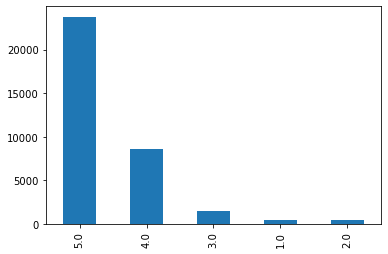

In [55]:
df['reviews.rating'].value_counts().plot(kind='bar')

- 5 and 4 star reviews are a lot common in this dataset than 3, 2 and 1 star revies. We will have to fix this class imbalance either by sampling or by assigning larger class weights to the low rated reviews

In [56]:
df['reviews.sentiment'] = df['reviews.rating'].apply(lambda x: 1 if x >= 4.0 else 0)

In [57]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'reviews.sentiment'],
      dtype='object')

Positive labels %: 6.763
Negative labels %: 93.237


<AxesSubplot:>

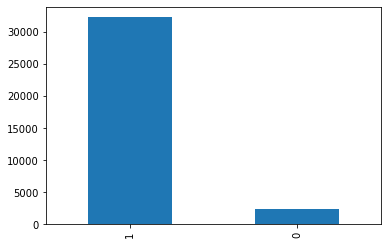

In [58]:
print(f"Positive labels %: {(df['reviews.sentiment'].value_counts()[0]/len(df)) * 100:.3f}")
print(f"Negative labels %: {(df['reviews.sentiment'].value_counts()[1]/len(df)) * 100:.3f}")
df['reviews.sentiment'].value_counts().plot(kind='bar')

- As we can observe in the above graph, even after clubbing together 3, 2, and 1 star reviews as negative reviews, the 5 and 4 star reviews still make up more than 90% of the entire datset

### Fixing the class imbalance

In [59]:
pos_sampled_df = df[df['reviews.sentiment'] == 1].sample(n=2344, random_state=42)
neg_sampled_df = df[df['reviews.sentiment'] == 0]

In [60]:
balanced_df = pos_sampled_df.append(neg_sampled_df)

In [61]:
balanced_df.shape

(4688, 22)

In [62]:
balanced_df = balanced_df[['id', 'reviews.text', 'reviews.sentiment']]

<AxesSubplot:>

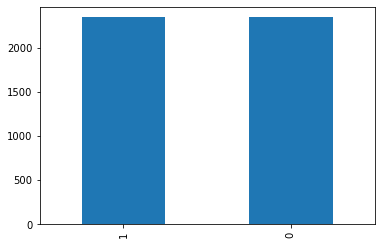

In [63]:
balanced_df['reviews.sentiment'].value_counts().plot(kind='bar')

- Now that the classes are balanced, we can begin the pre-processing the text data and prepare it for training our model

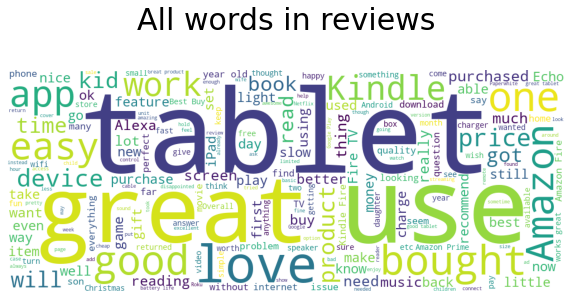

In [64]:
text = balanced_df['reviews.text']
wordcloud = WordCloud(background_color='white',
                     width=1000,
                     height=400).generate(" ".join(text))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title("All words in reviews\n", size=30)
plt.axis('off')
plt.show()

In [65]:
sentiment_words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

text = " ".join(balanced_df['reviews.text'])

In [66]:
dsen = {}
for word in text.split(" "):
    if word in sentiment_words:
        dsen[word] = dsen.get(word, 0)+1

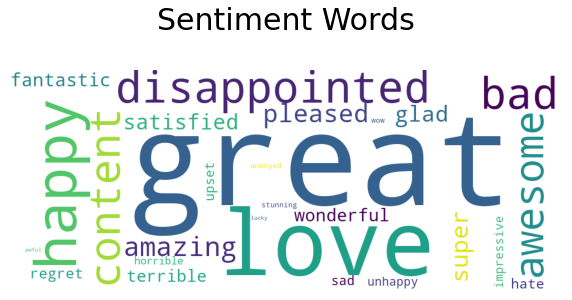

In [67]:
wordcloud = WordCloud(background_color='white',
                     width=1000,
                     height=400).generate_from_frequencies(dsen)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title("Sentiment Words\n", size=30)
plt.axis('off')
plt.show()

## NLP Pre-processing

In [68]:
balanced_df.head()

id  \
20923  AVphPmHuilAPnD_x3E5h   
7639   AVphgVaX1cnluZ0-DR74   
32334  AV1YE_muvKc47QAVgpwE   
18335  AV1YnRtnglJLPUi8IJmV   
31138  AV1YE_muvKc47QAVgpwE   

                                            reviews.text  reviews.sentiment  
20923  so far so good,,,, wife very happy. misses her...                  1  
7639   Its awaesome. I love it. The price is worth it...                  1  
32334  Easy to use and install Love it I get to strea...                  1  
18335  This is an awesome kindle easy to transport an...                  1  
31138  If you can jail break it. It will be a nice pr...                  1

In [69]:
#lowercase all text
balanced_df['reviews.text'] = balanced_df['reviews.text'].str.lower()

#tokenization
balanced_df['reviews.text'] = balanced_df.apply(lambda row: word_tokenize(
    row['reviews.text']), axis=1)

In [70]:
#get only alphabetic values
balanced_df['reviews.text'] = balanced_df['reviews.text'].apply(
    lambda x:[item for item in x if item.isalpha()])

#lemmatize
balanced_df['reviews.text'] = balanced_df['reviews.text'].apply(
    lambda x:[WordNetLemmatizer().lemmatize(y) for y in x])

#remove stopwords
stop_words = stopwords.words('english')
balanced_df['reviews.text'] = balanced_df['reviews.text'].apply(
    lambda x:[item for item in x if item not in stop_words])

In [71]:
balanced_df['reviews.text'].tolist()

[['far', 'good', 'wife', 'happy', 'miss', 'old', 'one'],
 ['awaesome', 'love', 'price', 'worth', 'buy'],
 ['easy', 'use', 'install', 'love', 'get', 'stream', 'almost', 'everything'],
 ['awesome', 'kindle', 'easy', 'transport', 'love', 'clear', 'screen'],
 ['jail', 'break', 'nice', 'product'],
 ['love',
  'amazon',
  'echo',
  'dont',
  'know',
  'wa',
  'able',
  'live',
  'without',
  'cabt',
  'reccomend',
  'enough'],
 ['ha', 'great', 'buy', 'two', 'friend', 'liked', 'bought', 'one'],
 ['wa',
  'looking',
  'something',
  'easy',
  'use',
  'want',
  'go',
  'computer',
  'great'],
 ['pro',
  'tablet',
  'great',
  'price',
  'ha',
  'good',
  'battery',
  'life',
  'resistant',
  'enough',
  'daily',
  'use',
  'con',
  'operating',
  'sistem',
  'limited',
  'downloading',
  'apps',
  'amazon',
  'app',
  'store',
  'screen',
  'resolution',
  'great'],
 ['got',
  'wife',
  'use',
  'sewing',
  'room',
  'along',
  'amazon',
  'prime',
  'music',
  'sound',
  'quality',
  'good',


In [72]:
#join tokens
balanced_df['reviews.text'] = balanced_df['reviews.text'].apply(
    lambda x:str(' '.join(x)))

In [73]:
balanced_df.head()

id  \
20923  AVphPmHuilAPnD_x3E5h   
7639   AVphgVaX1cnluZ0-DR74   
32334  AV1YE_muvKc47QAVgpwE   
18335  AV1YnRtnglJLPUi8IJmV   
31138  AV1YE_muvKc47QAVgpwE   

                                            reviews.text  reviews.sentiment  
20923                   far good wife happy miss old one                  1  
7639                       awaesome love price worth buy                  1  
32334  easy use install love get stream almost everyt...                  1  
18335    awesome kindle easy transport love clear screen                  1  
31138                            jail break nice product                  1

## Model Building

In [74]:
#building TFIDF matrix to train model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(balanced_df['reviews.text'])

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, 
                                                    balanced_df['reviews.sentiment'],
                                                    test_size=0.3,
                                                    random_state=25535)

#### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=25535)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [79]:
from sklearn.metrics import classification_report

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print()
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1655
           1       0.88      0.88      0.88      1626

    accuracy                           0.88      3281
   macro avg       0.88      0.88      0.88      3281
weighted avg       0.88      0.88      0.88      3281


Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       689
           1       0.80      0.77      0.78       718

    accuracy                           0.78      1407
   macro avg       0.78      0.78      0.78      1407
weighted avg       0.78      0.78      0.78      1407



#### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)
y_pred = rfmodel.predict(x_test)
y_pred_train = rfmodel.predict(x_train)

In [81]:
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print()
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1655
           1       1.00      1.00      1.00      1626

    accuracy                           1.00      3281
   macro avg       1.00      1.00      1.00      3281
weighted avg       1.00      1.00      1.00      3281


Test Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       689
           1       0.77      0.75      0.76       718

    accuracy                           0.76      1407
   macro avg       0.76      0.76      0.76      1407
weighted avg       0.76      0.76      0.76      1407



#### GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": [10, 50, 100, 200],
         "criterion": ("gini", "entropy")}
rfmodel = RandomForestClassifier()
gscv = GridSearchCV(rfmodel, params, cv=10)
gscv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': [10, 50, 100, 200]})

In [84]:
best_params = gscv.best_params_
best_accuracy = gscv.best_score_
print(f"Best Parameter: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Parameter: {'criterion': 'entropy', 'n_estimators': 200}
Best Accuracy: 0.7686633553265624


In [86]:
rf = RandomForestClassifier(criterion=best_params['criterion'],
                           n_estimators = best_params['n_estimators'])
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

In [87]:
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print()
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1655
           1       1.00      1.00      1.00      1626

    accuracy                           1.00      3281
   macro avg       1.00      1.00      1.00      3281
weighted avg       1.00      1.00      1.00      3281


Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       689
           1       0.79      0.74      0.76       718

    accuracy                           0.77      1407
   macro avg       0.77      0.77      0.77      1407
weighted avg       0.77      0.77      0.77      1407

